## Data Pre-processing

In [ ]:
!pip install transformers
!pip install tf-keras

In [ ]:
#importing all libraries
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
from tensorflow import keras
nltk.download('punkt')

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Misc.
import warnings
warnings.filterwarnings('ignore')
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#displaying of raw data
df = pd.read_csv(r"ATW.csv")
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df.head()

,Timestamp,What are your preferred pronouns?,"According to you, what does feminism stand for?",Swearing and obscenity are more repulsive in the speech of a woman than of a man.,"Under modern economic conditions with women being active outside the home, men should share in household tasks such as washing dishes and doing the laundry",There should be a strict merit system in job appointment and promotion without regard to sex.,A woman should be free as a man to propose marriage.,Women should worry less about their rights and more about becoming good wives and mothers.,Women should assume their rightful place in business and all the professions along with men.,A woman should not expect to go to exactly the same places or to have quite the same freedom of action as a man.,It is ridiculous for a woman to run a locomotive and for a man to darn socks.,"Women should be encouraged not to become sexually intimate with anyone before marriage, even their fiancés.",The husband should not be favored by law over the wife in the disposal of family property or income.,Women should be concerned with their duties of childbearing and house tending rather than with desires for professional or business careers.,The intellectual leadership of a community should be largely in the hands of men.,Economic and social freedom is worth far more to women than acceptance of the ideal of femininity which has been set up by men.,"On the average, women should be regarded as less capable of contributing to economic production than are men.",There are many jobs in which men should be given preference over women in being hired or promoted.,Men should not continue to show courtesies to women such as holding doors open for them and helping them with their coats.,Women are capable of separating their emotions from their ideas.,Most women need and want the kind of protection and support that men traditionally have given them.,The modern girl is entitled to the same freedom from regulation and control that is given to the modern boy.,Intoxication among women is worse than intoxication among men.,"If both husband and wife agree that sexual fidelity is not important, there is no reason why both should not have extramarital affairs.",A wife should make every effort to minimize irritations and inconveniences for the male head of the household.,It is childish for a woman to assert herself by retaining her maiden name after marriage.,A husband has no obligation to inform his wife of his financial plans.,The satisfaction of her husband’s sexual desires is a\nfundamental obligation of every wife.
0,8/18/2024 17:28:10,he/him,"The advocacy of social, political and economic...",4,1,1,1,5,1,5,5,5,1,4,5,1,5,5,1,1,4,1,4,4,5,5,2,5
1,8/18/2024 17:48:56,they/them,equality. not just gender blindness but gender...,5,1,1,1,5,1,5,5,5,5,5,5,1,5,5,2,1,5,1,5,1,5,5,5,5
2,8/18/2024 17:49:10,he/him,Destroying social and institutional constructs...,5,1,4,1,4,1,5,5,5,5,5,5,1,5,4,4,1,4,1,5,2,5,5,3,5
3,8/18/2024 17:53:27,he/him,Feminism is an idea of viewing both males and ...,4,1,1,1,5,1,5,4,4,1,4,5,3,5,5,5,3,2,1,5,3,5,5,5,5
4,8/18/2024 18:43:57,she/her,"Although, for the masses, the term has now bee...",5,1,2,1,5,1,5,5,5,1,5,5,1,5,5,4,1,5,1,5,2,5,5,5,5


In [ ]:
#renaming all columns for ease
df.rename(columns={
    df.columns[1]: 'Pronouns',
    df.columns[2]: 'Feminism',
    df.columns[3]: 'Swearing',
    df.columns[4]: 'Household',
    df.columns[5]: 'MeritSystem',
    df.columns[6]: 'ProposeMarriage',
    df.columns[7]: 'RightsVsRoles',
    df.columns[8]: 'WomenInBusiness',
    df.columns[9]: 'SocialExpectations',
    df.columns[10]: 'GenderRoles',
    df.columns[11]: 'PremaritalSex',
    df.columns[12]: 'FamilyProperty',
    df.columns[13]: 'TraditionalRoles',
    df.columns[14]: 'Leadership',
    df.columns[15]: 'EconFreedom',
    df.columns[16]: 'EconContribution',
    df.columns[17]: 'JobPreference',
    df.columns[18]: 'GenderCourtesies',
    df.columns[19]: 'EmotionVsIdeas',
    df.columns[20]: 'ProtectionSupport',
    df.columns[21]: 'SocialFreedom',
    df.columns[22]: 'Intoxication',
    df.columns[23]: 'Fidelity',
    df.columns[24]: 'WifeRole',
    df.columns[25]: 'MaidenName',
    df.columns[26]: 'FinancialPlans',
    df.columns[27]: 'SexualObligation'
}, inplace=True)
print(df.columns)


Index(['Timestamp', 'Pronouns', 'Feminism', 'Swearing', 'Household',
       'MeritSystem', 'ProposeMarriage', 'RightsVsRoles', 'WomenInBusiness',
       'SocialExpectations', 'GenderRoles', 'PremaritalSex', 'FamilyProperty',
       'TraditionalRoles', 'Leadership', 'EconFreedom', 'EconContribution',
       'JobPreference', 'GenderCourtesies', 'EmotionVsIdeas',
       'ProtectionSupport', 'SocialFreedom', 'Intoxication', 'Fidelity',
       'WifeRole', 'MaidenName', 'FinancialPlans', 'SexualObligation'],
      dtype='object')


In [ ]:
#display of last 5 rows after renaming
df.tail()

,Timestamp,Pronouns,Feminism,Swearing,Household,MeritSystem,ProposeMarriage,RightsVsRoles,WomenInBusiness,SocialExpectations,GenderRoles,PremaritalSex,FamilyProperty,TraditionalRoles,Leadership,EconFreedom,EconContribution,JobPreference,GenderCourtesies,EmotionVsIdeas,ProtectionSupport,SocialFreedom,Intoxication,Fidelity,WifeRole,MaidenName,FinancialPlans,SexualObligation
214,8/28/2024 21:35:10,he/him,"Feminism stands for respecting women, and givi...",5,1,1,1,5,1,4,5,5,1,5,5,2,5,2,5,1,4,1,5,4,5,5,4,4
215,8/28/2024 23:10:14,he/him,I'll rather say what feminism should stand for...,4,1,1,1,4,2,5,5,3,1,3,5,2,5,5,3,2,5,1,5,5,4,5,3,4
216,8/29/2024 0:49:57,she/her,Equality,5,1,1,1,5,1,5,5,5,1,5,5,1,5,5,5,1,1,1,5,3,5,5,5,5
217,8/31/2024 8:40:42,she/her,both sexes getting equal treatment and opportu...,5,1,1,1,5,1,5,5,5,1,5,5,1,5,4,5,1,2,3,5,3,5,5,5,2
218,8/31/2024 11:15:56,she/her,"Simple: equal opportunities, treatment, rights...",5,1,1,1,5,1,5,5,5,1,5,5,1,5,5,1,1,5,1,5,1,5,5,5,5


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           219 non-null    datetime64[ns]
 1   Pronouns            219 non-null    object        
 2   Feminism            219 non-null    object        
 3   Swearing            219 non-null    int64         
 4   Household           219 non-null    int64         
 5   MeritSystem         219 non-null    int64         
 6   ProposeMarriage     219 non-null    int64         
 7   RightsVsRoles       219 non-null    int64         
 8   WomenInBusiness     219 non-null    int64         
 9   SocialExpectations  219 non-null    int64         
 10  GenderRoles         219 non-null    int64         
 11  PremaritalSex       219 non-null    int64         
 12  FamilyProperty      219 non-null    int64         
 13  TraditionalRoles    219 non-null    int64         

In [ ]:
df.describe()

,Timestamp,Swearing,Household,MeritSystem,ProposeMarriage,RightsVsRoles,WomenInBusiness,SocialExpectations,GenderRoles,PremaritalSex,FamilyProperty,TraditionalRoles,Leadership,EconFreedom,EconContribution,JobPreference,GenderCourtesies,EmotionVsIdeas,ProtectionSupport,SocialFreedom,Intoxication,Fidelity,WifeRole,MaidenName,FinancialPlans,SexualObligation
count,219,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2024-08-23 21:45:07.333333248,4.246575,1.187215,1.584475,1.105023,4.767123,1.470320,4.397260,4.694064,3.904110,2.027397,4.534247,4.547945,1.684932,4.484018,3.639269,3.662100,1.963470,2.849315,1.456621,3.913242,3.100457,3.990868,4.511416,4.319635,4.205479
min,2024-08-18 17:28:10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2024-08-19 19:21:40.500000,4.000000,1.000000,1.000000,1.000000,5.000000,1.000000,4.000000,5.000000,3.000000,1.000000,4.000000,4.000000,1.000000,4.000000,2.500000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,3.000000,4.000000,4.000000,3.500000
50%,2024-08-26 21:55:00,5.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,1.000000,5.000000,3.000000,4.000000,5.000000,5.000000,5.000000
75%,2024-08-26 23:07:50,5.000000,1.000000,2.000000,1.000000,5.000000,2.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,3.000000,4.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2024-08-31 11:15:56,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,NaN,1.150757,0.555722,1.025338,0.441975,0.579161,0.939835,1.067532,0.718377,1.342643,1.302495,0.808479,0.813438,0.926818,0.959487,1.334961,1.257994,1.144808,1.222922,0.996181,1.315664,1.573563,1.176961,0.959552,1.048427,1.070354


In [ ]:
df.shape

(219, 28)

In [ ]:
df['Pronouns'].value_counts()

,count
Pronouns,
he/him,135
she/her,73
they/them,11


In [ ]:
features = df[['Swearing', 'Household',
       'MeritSystem', 'ProposeMarriage', 'RightsVsRoles', 'WomenInBusiness',
       'SocialExpectations', 'GenderRoles', 'PremaritalSex', 'FamilyProperty',
       'TraditionalRoles', 'Leadership', 'EconFreedom', 'EconContribution',
       'JobPreference', 'GenderCourtesies', 'EmotionVsIdeas',
       'ProtectionSupport', 'SocialFreedom', 'Intoxication', 'Fidelity',
       'WifeRole', 'MaidenName', 'FinancialPlans', 'SexualObligation']]

<ipython-input-34-58f9c3823aea>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplots.set_xticklabels(subplots.get_xticklabels(), rotation=45)
<ipython-input-34-58f9c3823aea>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplots.set_xticklabels(subplots.get_xticklabels(), rotation=45)
<ipython-input-34-58f9c3823aea>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplots.set_xticklabels(subplots.get_xticklabels(), rotation=45)
<ipython-input-34-58f9c3823aea>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplots.set_xticklabels(subplots.get_xticklabels(), rotation=45)
<ipython-input-34-58f9c3823aea>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplots.set_xticklabels(subplots.get_xticklabels(), rotation=45)
<ipython-input-34-58f9c3823aea>:9: UserWarning: FixedFormatter should only be used together with FixedLocator


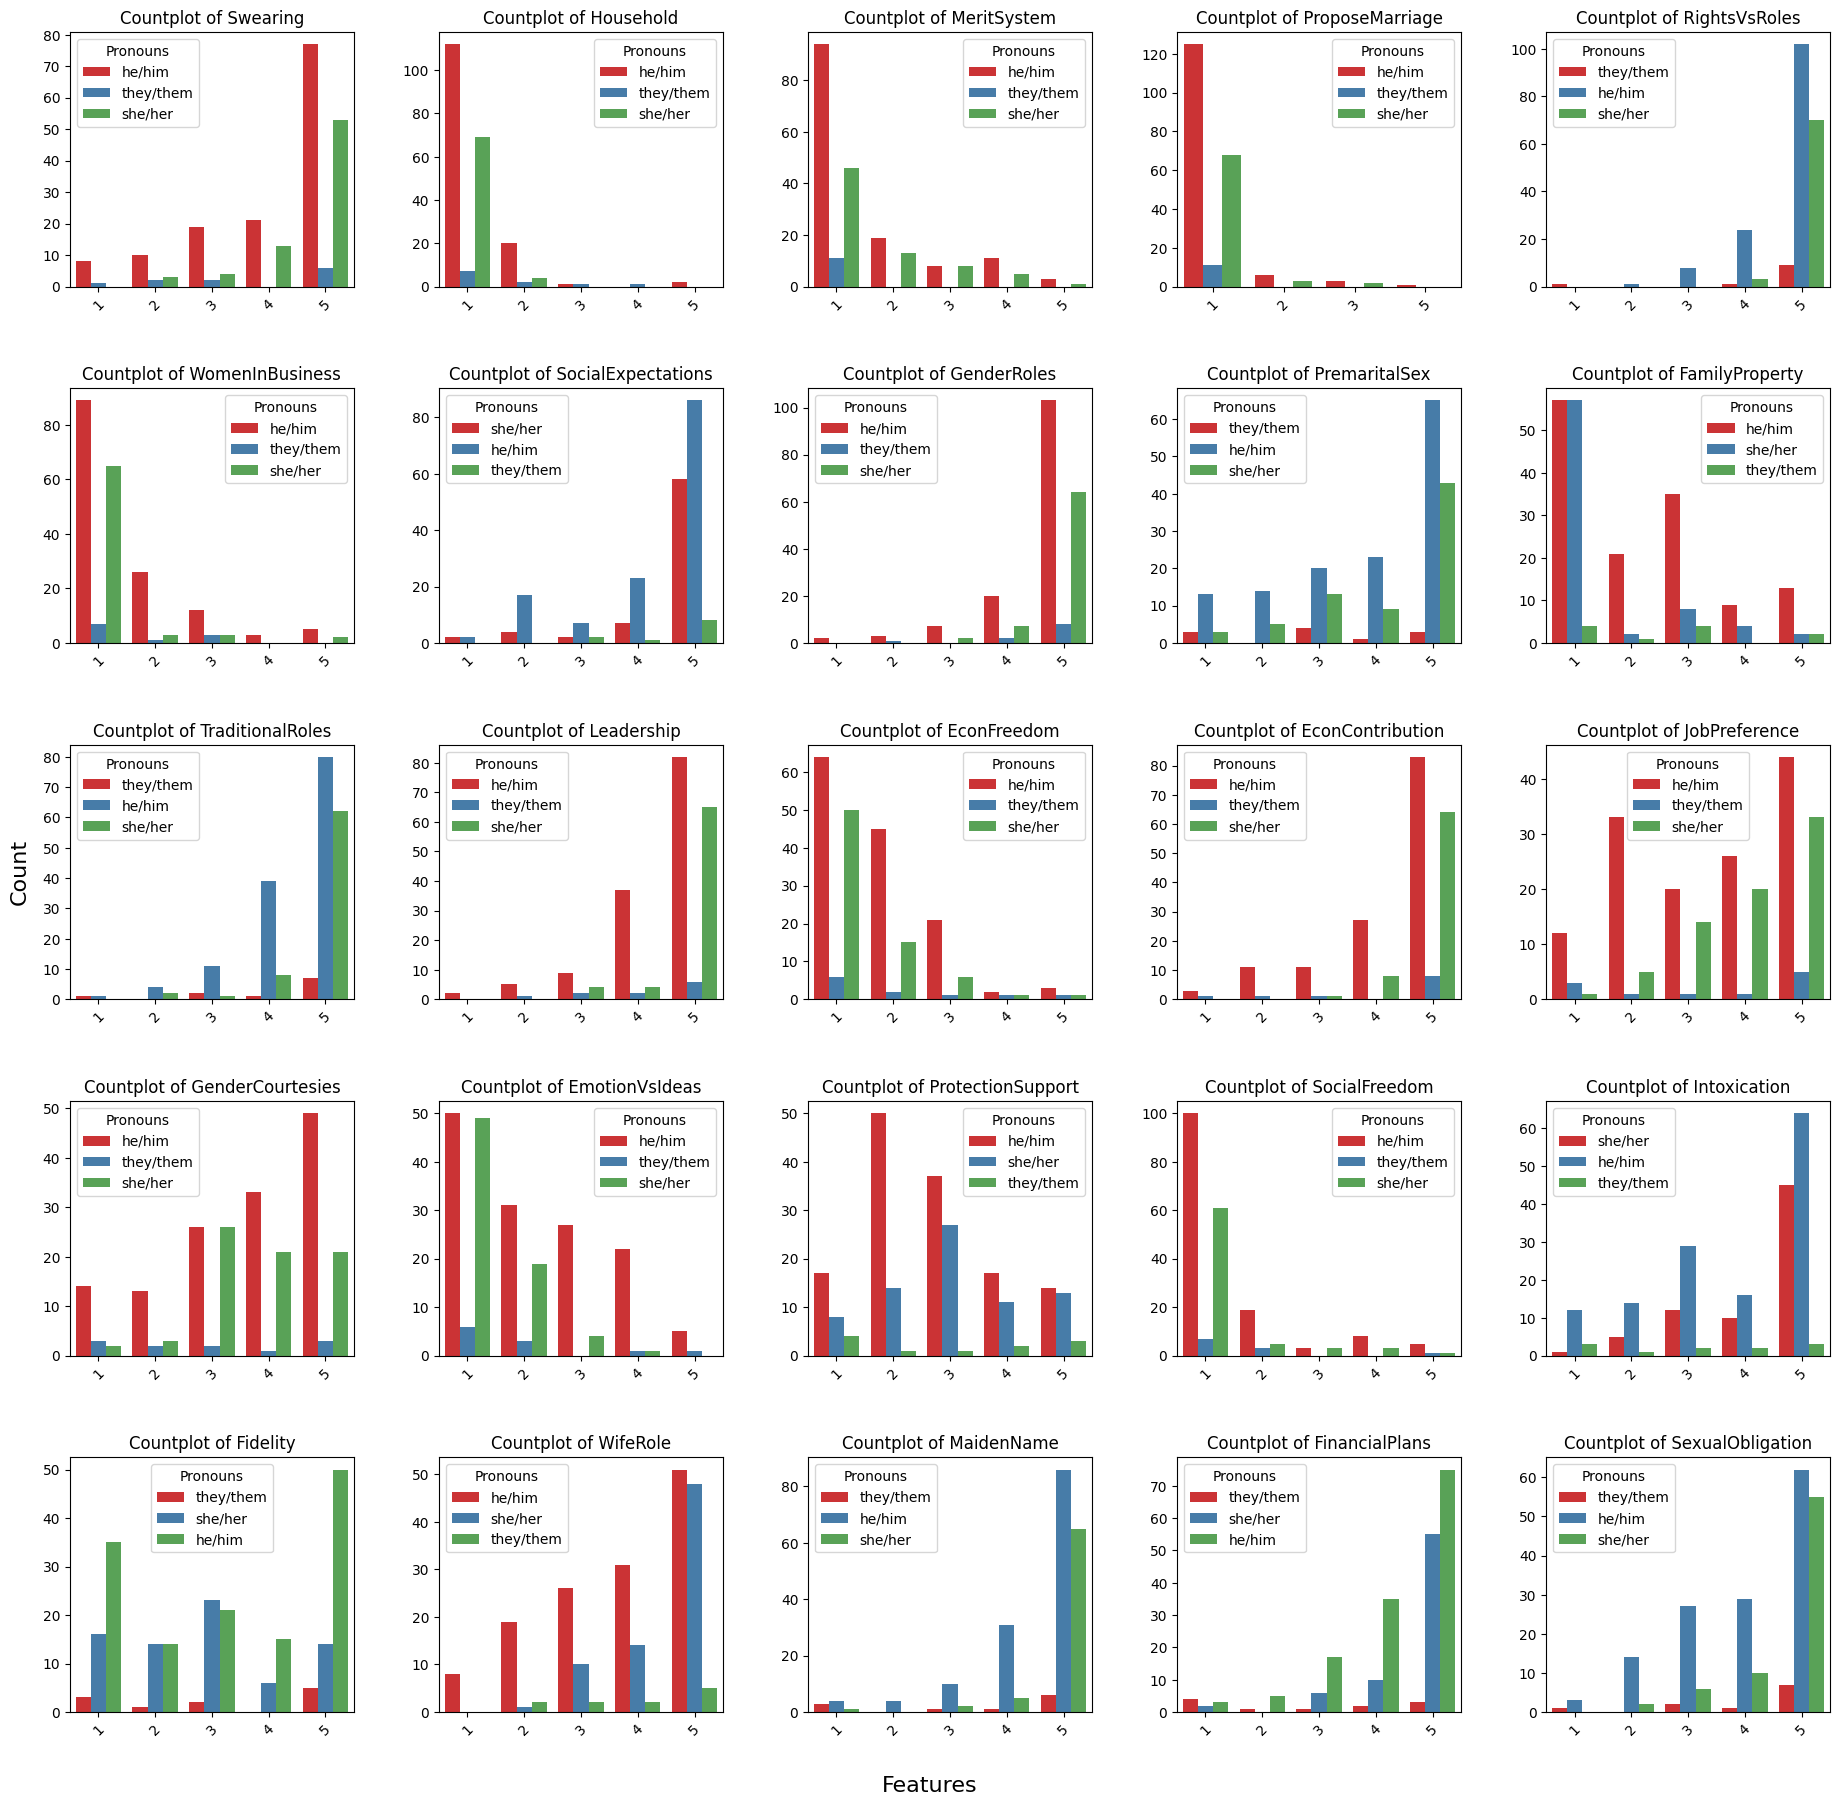

In [ ]:
sns.set_palette("Set1")
fig, ax = plt.subplots(5,5, figsize=(20,20))
for i, subplots in zip (features, ax.flatten()):
  df_melted = df.melt(id_vars=['Pronouns'], value_vars=[i])
  sns.countplot(x=features[i], hue='Pronouns', data=df_melted, ax=subplots)
  subplots.set_title(f"Countplot of {i}")

    # Rotating x-tick labels for better readability
  subplots.set_xticklabels(subplots.get_xticklabels(), rotation=45)

    # Removing redundant xlabel and ylabel
  subplots.set_xlabel('')
  subplots.set_ylabel('')
# Adding common labels for the entire plot
fig.text(0.5, 0.04, 'Features', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=16)

# Adjusting the layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(left=0.07, bottom=0.08, right=0.95, top=0.92, wspace=0.3, hspace=0.4)
plt.show()

<ipython-input-28-a47a09d61819>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplots.set_xticklabels(subplots.get_xticklabels(), rotation=45)
<ipython-input-28-a47a09d61819>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplots.set_xticklabels(subplots.get_xticklabels(), rotation=45)
<ipython-input-28-a47a09d61819>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplots.set_xticklabels(subplots.get_xticklabels(), rotation=45)
<ipython-input-28-a47a09d61819>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplots.set_xticklabels(subplots.get_xticklabels(), rotation=45)
<ipython-input-28-a47a09d61819>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplots.set_xticklabels(subplots.get_xticklabels(), rotation=45)
<ipython-input-28-a47a09d61819>:10: UserWarning: FixedFormatter should only be used together with FixedLo

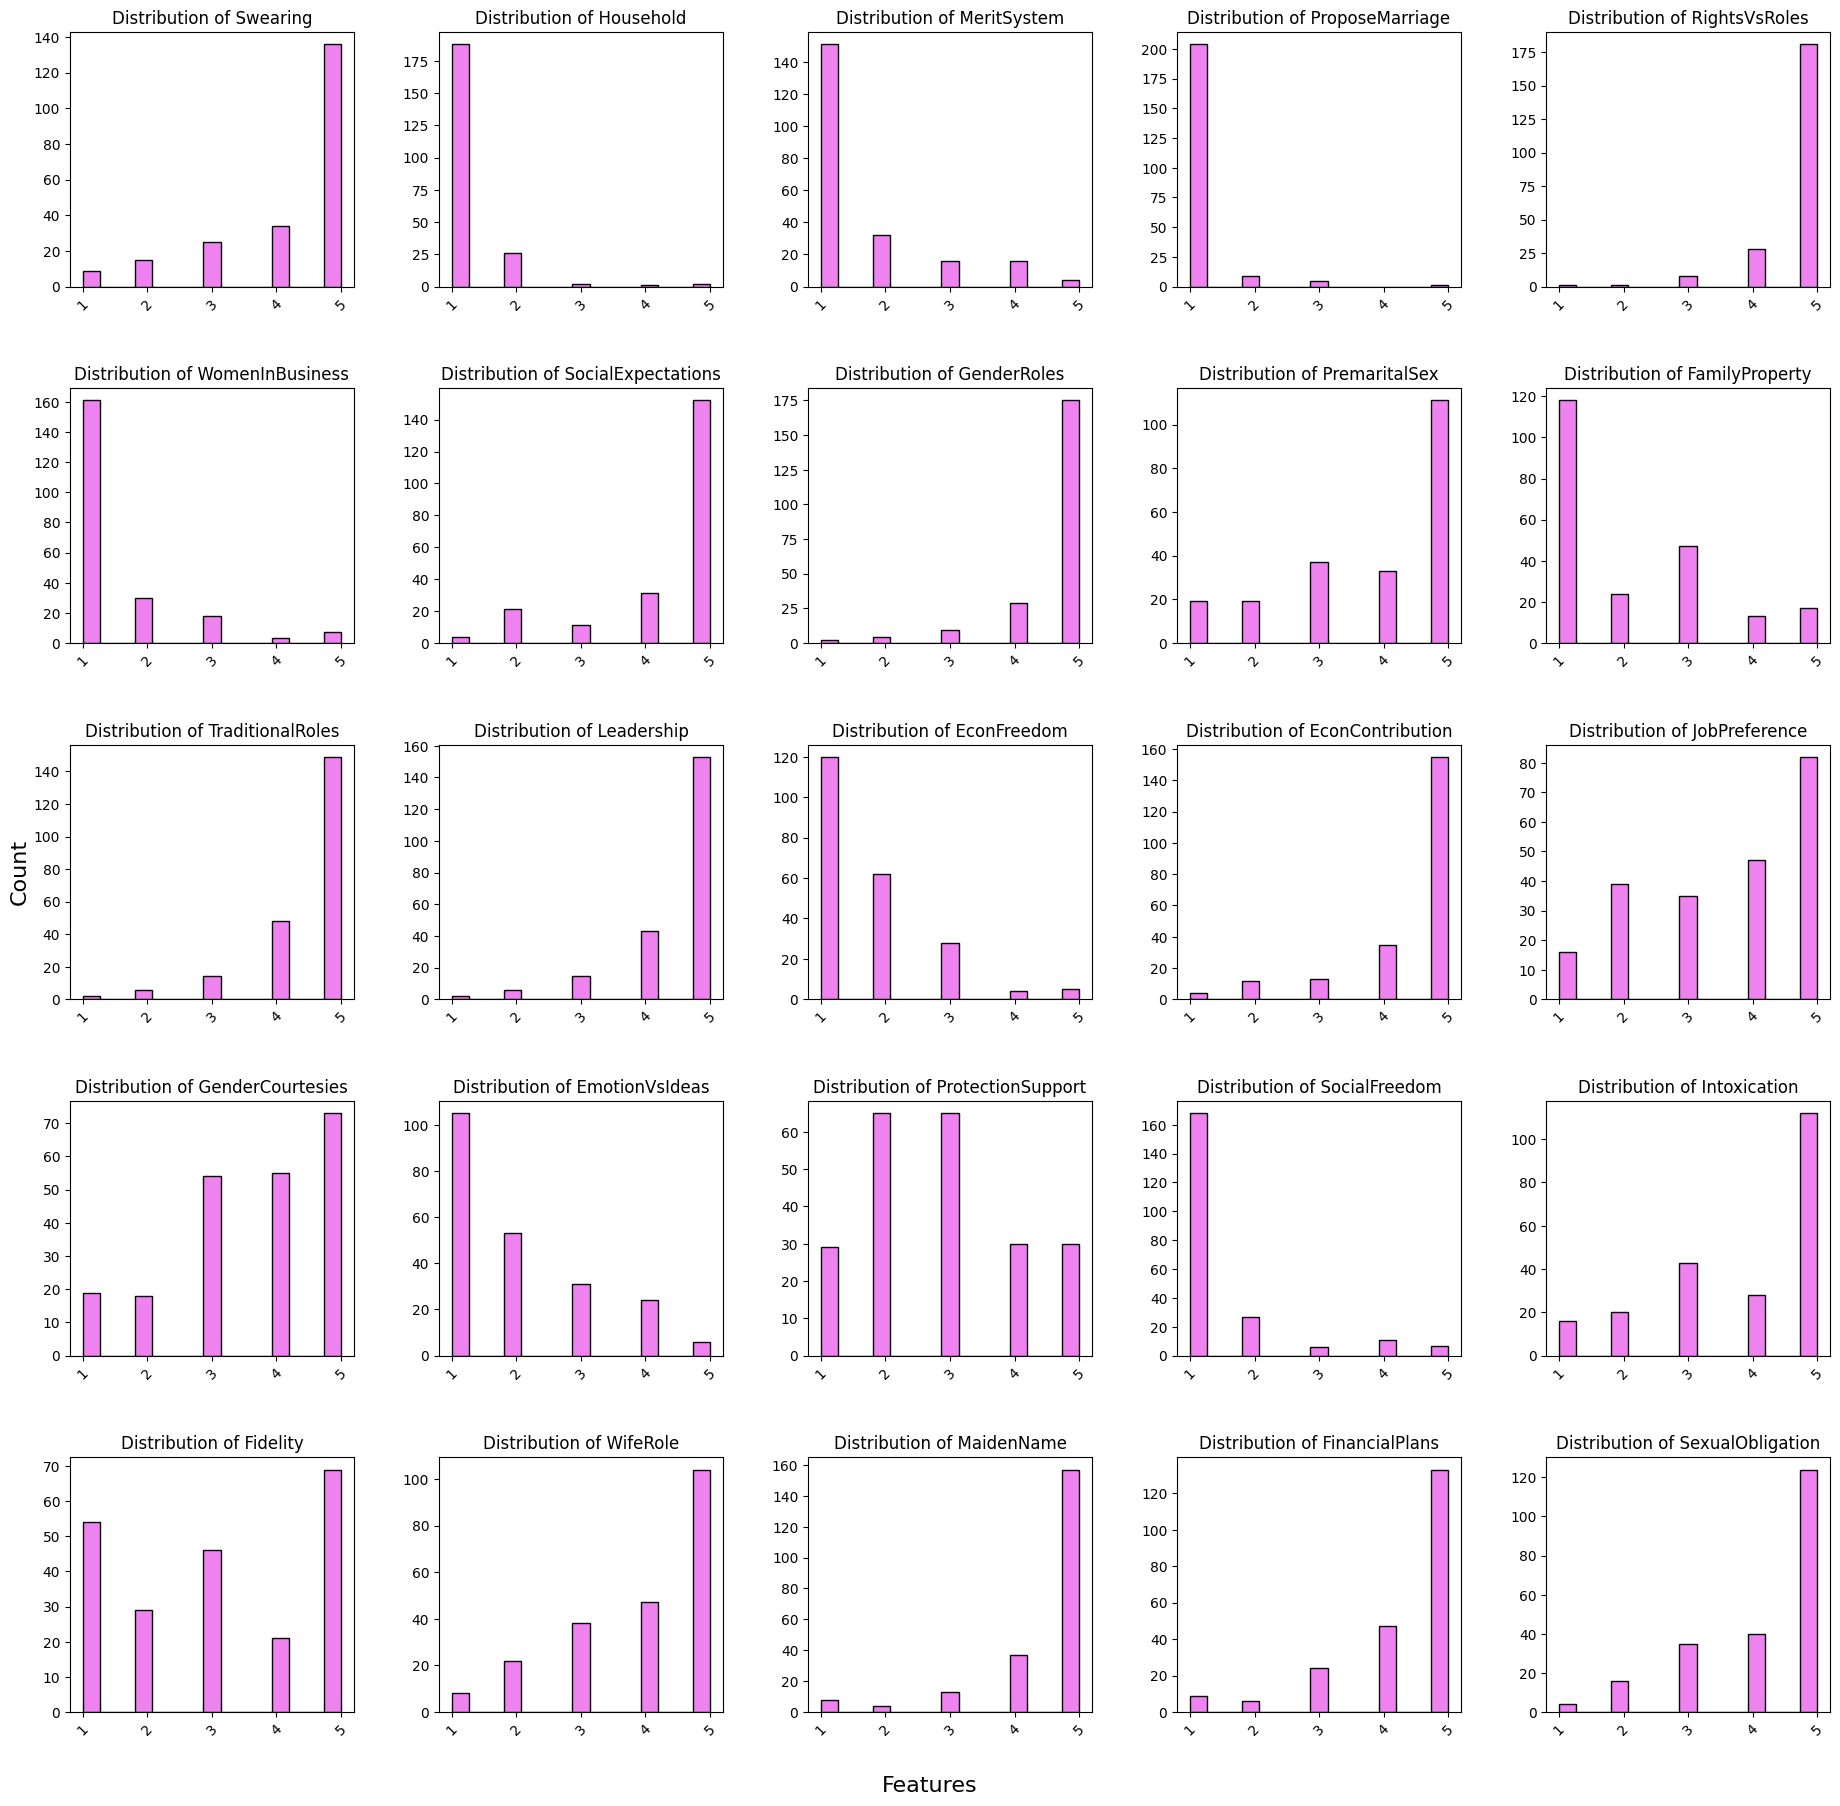

In [ ]:
fig, ax = plt.subplots(5,5, figsize=(20,20))
for i, subplots in zip (features, ax.flatten()):
  df_melted = df.melt(id_vars=['Pronouns'], value_vars=[i])
  subplots.hist(df[i], bins=15, color='violet', edgecolor='black')
  subplots.set_xlabel(i)
  subplots.set_ylabel('Count')
  subplots.set_title(f"Distribution of {i}")

    # Rotating x-tick labels for better readability
  subplots.set_xticklabels(subplots.get_xticklabels(), rotation=45)

    # Removing redundant xlabel and ylabel
  subplots.set_xlabel('')
  subplots.set_ylabel('')
# Adding common labels for the entire plot
fig.text(0.5, 0.04, 'Features', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=16)

# Adjusting the layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(left=0.07, bottom=0.08, right=0.95, top=0.92, wspace=0.3, hspace=0.4)
plt.show()

## NLTK

In [ ]:
df.Feminism[0]

'The advocacy of social, political and economic reforms to uplift women and undo the damage of centuries which held them back in almost all areas of society.'

In [ ]:
tokens = nltk.word_tokenize(df.Feminism[0])
tokens

['The',
 'advocacy',
 'of',
 'social',
 ',',
 'political',
 'and',
 'economic',
 'reforms',
 'to',
 'uplift',
 'women',
 'and',
 'undo',
 'the',
 'damage',
 'of',
 'centuries',
 'which',
 'held',
 'them',
 'back',
 'in',
 'almost',
 'all',
 'areas',
 'of',
 'society',
 '.']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged

[('The', 'DT'),
 ('advocacy', 'NN'),
 ('of', 'IN'),
 ('social', 'JJ'),
 (',', ','),
 ('political', 'JJ'),
 ('and', 'CC'),
 ('economic', 'JJ'),
 ('reforms', 'NNS'),
 ('to', 'TO'),
 ('uplift', 'VB'),
 ('women', 'NNS'),
 ('and', 'CC'),
 ('undo', 'VB'),
 ('the', 'DT'),
 ('damage', 'NN'),
 ('of', 'IN'),
 ('centuries', 'NNS'),
 ('which', 'WDT'),
 ('held', 'VBD'),
 ('them', 'PRP'),
 ('back', 'RP'),
 ('in', 'IN'),
 ('almost', 'RB'),
 ('all', 'DT'),
 ('areas', 'NNS'),
 ('of', 'IN'),
 ('society', 'NN'),
 ('.', '.')]

In [ ]:
ent = nltk.chunk.ne_chunk(tagged)
ent.pprint()

(S
  The/DT
  advocacy/NN
  of/IN
  social/JJ
  ,/,
  political/JJ
  and/CC
  economic/JJ
  reforms/NNS
  to/TO
  uplift/VB
  women/NNS
  and/CC
  undo/VB
  the/DT
  damage/NN
  of/IN
  centuries/NNS
  which/WDT
  held/VBD
  them/PRP
  back/RP
  in/IN
  almost/RB
  all/DT
  areas/NNS
  of/IN
  society/NN
  ./.)


## Cleaning of column 'Feminism'

In [ ]:
#Remove HTML tags
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df.Feminism = df.Feminism.apply(clean)
df.Feminism[0]

'The advocacy of social, political and economic reforms to uplift women and undo the damage of centuries which held them back in almost all areas of society.'

In [ ]:
#Remove special characters
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df.Feminism = df.Feminism.apply(is_special)
df.Feminism[0]

'advocaci social polit econom reform uplift women undo damag centuri held back almost area societi'

In [ ]:
#Convert everything to lowercase
def to_lower(text):
    return text.lower()

df.Feminism = df.Feminism.apply(to_lower)
df.Feminism[0]

'advocaci social polit econom reform uplift women undo damag centuri held back almost area societi'

In [ ]:
#Remove stopwords
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df.Feminism = df.Feminism.apply(rem_stopwords)
df.Feminism[0]

['advocaci',
 'social',
 'polit',
 'econom',
 'reform',
 'uplift',
 'women',
 'undo',
 'damag',
 'centuri',
 'held',
 'back',
 'almost',
 'area',
 'societi']

In [ ]:
#Stem the words
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

df.Feminism = df.Feminism.apply(stem_txt)
df.Feminism[0]

'advocaci social polit econom reform uplift women undo damag centuri held back almost area societi'

## VADER Model

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df.insert(0, 'n_index', range(1, 1 + len(df)))

In [ ]:
#Run polarity scores for entire dataset
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text=row['Feminism']
  myid=row['n_index']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/219 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index' :'n_index'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head(10)

,n_index,neg,neu,pos,compound,Timestamp,Pronouns,Feminism,Swearing,Household,MeritSystem,ProposeMarriage,RightsVsRoles,WomenInBusiness,SocialExpectations,GenderRoles,PremaritalSex,FamilyProperty,TraditionalRoles,Leadership,EconFreedom,EconContribution,JobPreference,GenderCourtesies,EmotionVsIdeas,ProtectionSupport,SocialFreedom,Intoxication,Fidelity,WifeRole,MaidenName,FinancialPlans,SexualObligation
0,1,0.000,1.000,0.000,0.0000,2024-08-18 17:28:10,he/him,advocaci social polit econom reform uplift wom...,4,1,1,1,5,1,5,5,5,1,4,5,1,5,5,1,1,4,1,4,4,5,5,2,5
1,2,0.325,0.361,0.313,-0.0258,2024-08-18 17:48:56,they/them,equal gender blind gender accept,5,1,1,1,5,1,5,5,5,5,5,5,1,5,5,2,1,5,1,5,1,5,5,5,5
2,3,0.219,0.582,0.199,0.1027,2024-08-18 17:49:10,he/him,destroy social institut construct barrier wome...,5,1,4,1,4,1,5,5,5,5,5,5,1,5,4,4,1,4,1,5,2,5,5,3,5
3,4,0.110,0.890,0.000,-0.4767,2024-08-18 17:53:27,he/him,femin idea view male femal equal social aspect...,4,1,1,1,5,1,5,4,4,1,4,5,3,5,5,5,3,2,1,5,3,5,5,5,5
4,5,0.114,0.870,0.016,-0.7783,2024-08-18 18:43:57,she/her,although mass term conflat mean someth entir o...,5,1,2,1,5,1,5,5,5,1,5,5,1,5,5,4,1,5,1,5,2,5,5,5,5
5,6,0.000,0.488,0.512,0.6369,2024-08-18 19:10:06,she/her,advoc equal freedom choic women,5,1,2,1,5,1,5,5,5,1,5,5,1,5,5,3,2,5,1,5,1,5,5,5,5
6,7,0.000,1.000,0.000,0.0000,2024-08-19 14:35:21,she/her,equal opportun right,5,1,1,1,5,1,4,5,4,1,5,5,1,5,4,3,1,2,1,5,2,4,5,5,5
7,8,0.337,0.396,0.267,-0.1779,2024-08-19 14:41:46,she/her,judgement man woman treat punish equal,5,1,1,1,5,1,5,5,5,1,5,5,1,5,5,3,1,4,1,3,2,5,5,5,5
8,9,0.000,0.789,0.211,0.4939,2024-08-19 14:42:58,he/him,femin stand right women becom equal par men ab...,3,1,1,1,5,2,4,4,4,3,4,4,2,3,3,3,4,2,1,5,1,3,4,5,2
9,10,0.000,1.000,0.000,0.0000,2024-08-19 14:46:45,she/her,uplift women men women equal right opportun,5,1,1,1,5,1,5,5,5,1,5,5,1,5,5,3,1,4,1,5,2,5,5,5,5


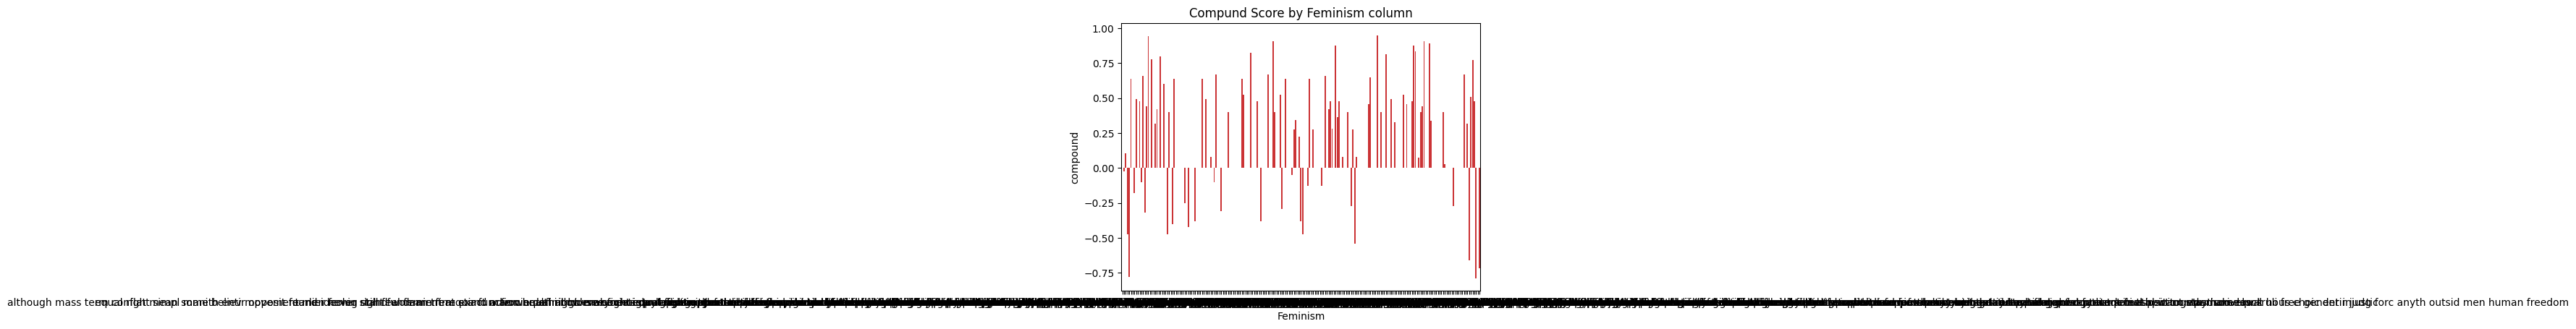

In [ ]:
ax = sns.barplot(data=vaders, x='Feminism', y='compound')
ax.set_title('Compund Score by Feminism column')
plt.show()

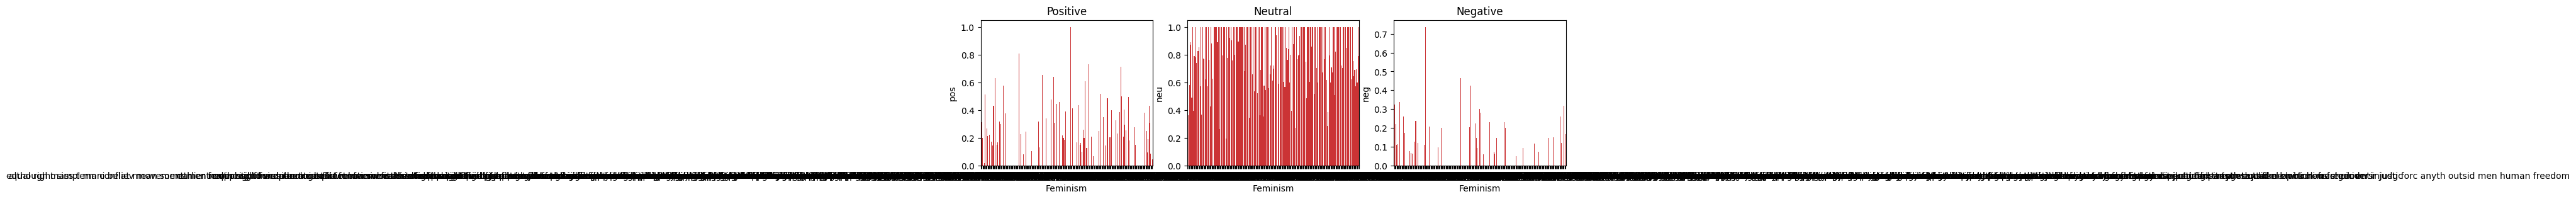

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Feminism', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Feminism', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Feminism', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()